In [19]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.cluster import KMeans

In [20]:
df = pd.read_csv("./text.csv")
df

,Country,Latitude,Longitude,Language
0,USA,44.97,-103.77,English
1,Canada,62.40,-96.40,English
2,France,46.75,2.40,French
3,UK,54.01,-2.53,English
4,Germany,51.15,10.40,German
5,Australia,-25.45,133.11,English


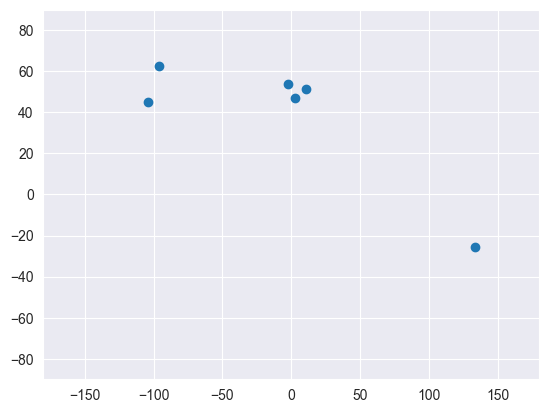

In [21]:
plt.scatter(df["Longitude"], df["Latitude"])

plt.xlim(-180, 180)
plt.ylim(-90, 90)
plt.show()

# Select the features

In [22]:
x = df.drop(["Country", "Language"], axis = 1)

In [23]:
x 

,Latitude,Longitude
0,44.97,-103.77
1,62.40,-96.40
2,46.75,2.40
3,54.01,-2.53
4,51.15,10.40
5,-25.45,133.11


# Clustering

In [24]:
kmeans = KMeans(n_clusters = 3)
kmeans.fit(x)

KMeans(n_clusters=3)

# Clustering results

In [25]:
identified_clusters = kmeans.fit_predict(x)

# It computs cluster centers and predict cluster index for each sample

identified_clusters

array([0, 0, 1, 1, 1, 2])

In [26]:
data_with_cluster = df.copy()

data_with_cluster["Cluster"] = identified_clusters

data_with_cluster

,Country,Latitude,Longitude,Language,Cluster
0,USA,44.97,-103.77,English,0
1,Canada,62.40,-96.40,English,0
2,France,46.75,2.40,French,1
3,UK,54.01,-2.53,English,1
4,Germany,51.15,10.40,German,1
5,Australia,-25.45,133.11,English,2


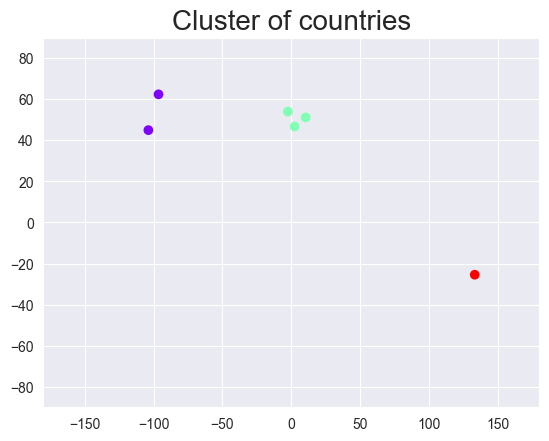

In [28]:
plt.scatter(data_with_cluster["Longitude"], data_with_cluster["Latitude"], c = data_with_cluster["Cluster"], cmap = "rainbow")

plt.xlim(-180, 180)
plt.ylim(-90, 90)

plt.title("Cluster of countries", size = 20)

plt.show()

# Clustering the categorical data

In [29]:
data_mapped = df.copy()

data_mapped["Language"] = data_mapped["Language"].map({"English": 0, "French": 1, "German": 2})

data_mapped

,Country,Latitude,Longitude,Language
0,USA,44.97,-103.77,0
1,Canada,62.40,-96.40,0
2,France,46.75,2.40,1
3,UK,54.01,-2.53,0
4,Germany,51.15,10.40,2
5,Australia,-25.45,133.11,0


# Feature selection

In [30]:
x = data_mapped.iloc[:, 1:4]

x

,Latitude,Longitude,Language
0,44.97,-103.77,0
1,62.40,-96.40,0
2,46.75,2.40,1
3,54.01,-2.53,0
4,51.15,10.40,2
5,-25.45,133.11,0


# Clustering

In [32]:
kmeans = KMeans(3)

kmeans.fit(x)

KMeans(n_clusters=3)

# Results

In [33]:
identified_clusters = kmeans.fit_predict(x)

identified_clusters

array([0, 0, 1, 1, 1, 2])

In [34]:
data_with_cluster = data_mapped.copy()

data_with_cluster["Cluster"] = identified_clusters

data_with_cluster

,Country,Latitude,Longitude,Language,Cluster
0,USA,44.97,-103.77,0,0
1,Canada,62.40,-96.40,0,0
2,France,46.75,2.40,1,1
3,UK,54.01,-2.53,0,1
4,Germany,51.15,10.40,2,1
5,Australia,-25.45,133.11,0,2


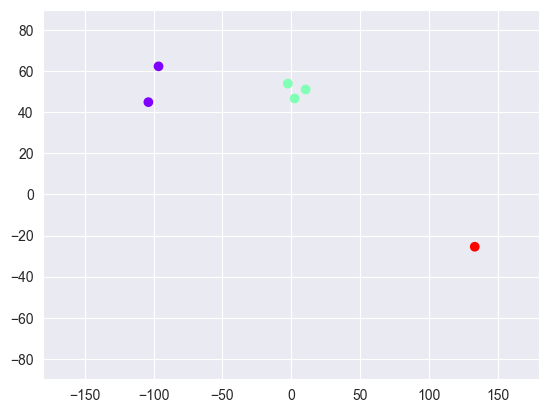

In [35]:
plt.scatter(data_with_cluster["Longitude"], data_with_cluster["Latitude"], c = data_with_cluster["Cluster"], cmap = "rainbow")

plt.xlim(-180, 180)
plt.ylim(-90, 90)
plt.show()